In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


from drawfunc import *

In [2]:
print(check())

10


(427, 400, 3)


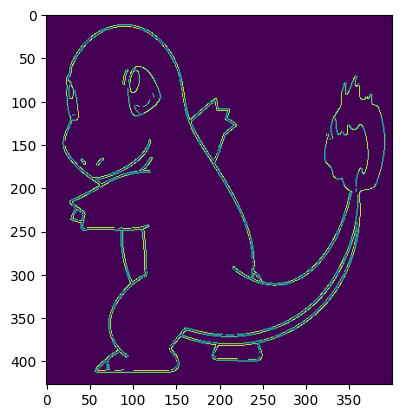

In [3]:
# define variable

#1 edge_img
img = cv2.imread('pylee.png')
img = cv2.resize(img, (400, 400 * img.shape[1]//img.shape[0]))
print(img.shape)
threshold1 = 500
threshold2 = 500
edge_img = cv2.Canny(img, threshold1, threshold2)

# edge_img = 255 - edge_img
cv2.imwrite('testtestest.jpg', edge_img)
plt.imshow(edge_img)
plt.imsave("test1.jpg", edge_img)

#2 line_info[[sp1, sp2], d1, d2, ...]
line_info = []




In [4]:
print(edge_img.shape)


(427, 400)


In [5]:
#3 check layer: ckVec
ckVec = np.zeros(edge_img.shape) # 비면 0, 선 시작은 2, 선 중간은 1, 단일픽셀로 지워진 경우 3
line_info = []

In [6]:
#정해진 횟수 만큼 선을 뽑는다. 
progress_num = 0
while True:
    for j in range(50):
        line_info, ckVec = lining(edge_img, line_info, ckVec)
    
    ckVec = erase_noise(edge_img, ckVec)
    print_img(ckVec, line_info, f"img_{progress_num}", True)
    progress_num+=1
    if imgIsEmpty(edge_img, ckVec) or progress_num==1000:
        break
    

Line 10 done!
Line 20 done!
Line 30 done!
Line 40 done!
Line 50 done!
erased 5 pixels!
img_0 print!
Line 60 done!
Line 70 done!
Line 80 done!
Line 90 done!
Line 100 done!
erased 0 pixels!
img_1 print!
Line 110 done!
Line 120 done!
Line 130 done!
Line 140 done!
Line 150 done!
erased 0 pixels!
img_2 print!
Line 160 done!
Line 170 done!
Line 180 done!
Line 190 done!
Line 200 done!
erased 0 pixels!
img_3 print!
Line 210 done!
Line 220 done!
Line 230 done!
Line 240 done!
Line 250 done!
erased 0 pixels!
img_4 print!
Line 260 done!
Line 270 done!
Line 280 done!
Line 290 done!
Line 300 done!
erased 0 pixels!
img_5 print!
Line 310 done!
Line 320 done!
Line 330 done!
Line 340 done!
Line 350 done!
erased 0 pixels!
img_6 print!
Image is empty!


In [7]:
print(imgIsEmpty(edge_img, ckVec))

Image is empty!
True


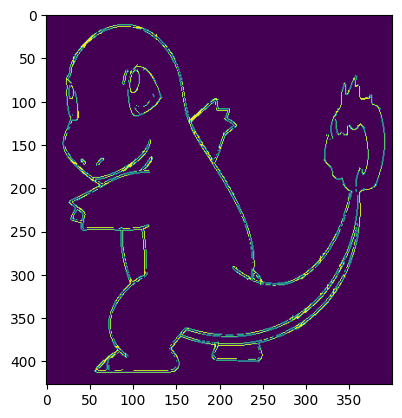

In [10]:
plt.imshow(print_img(ckVec, line_info, f"img_final"))

In [11]:
line_clear = noise_del(line_info, 10)

In [12]:
line_num=0
for i in line_clear:
    if i == 100:
        continue
    line_num+=1
print(f" Total Line number: {line_num}")

124


In [13]:
# 최종 이미지 출력
final_img = print_img(ckVec, line_clear, f"img_final" ,True)
final_before_noiseDel = print_img(ckVec, line_info, f"img_final")

img_final print!


In [14]:
print(imgIsEmpty(final_img, final_before_noiseDel))

Image is empty!
True


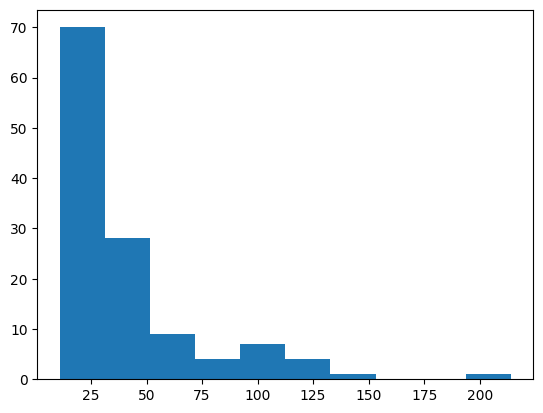

In [10]:
# 선 길이 분포표
line_len = []
for i in line_clear:
    if i == 100:
        continue
    line_len.append(len(i) - 1)
    
plt.hist(line_len)

plt.show()




False


In [12]:
# 재구축
# 8이면 올리고, 나미저면 출력
# find the initial point
"""
img_vec = np.zeros(list(ckVec.shape), dtype=np.uint8)
frame_array = []

out = cv2.VideoWriter(f'drawline_{num}.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, ckVec.shape)

a = 0

for i in line_info:
    if i == 100:
        continue

    sp = i[0]
    for j in range(1, len(i)):
        img_vec[sp[0], sp[1]] = 255
        
        vid_vec = cv2.cvtColor(img_vec,cv2.COLOR_GRAY2BGR)
        # print(type(vid_vec))
        out.write(vid_vec)
        a += 1
        sp = next_pixel(sp, i[j])
    # cv2.imwrite(f'/root/home/data/vodimg/{num}.jpg',img)
    
    

    
print(a)

out.release()
        

        
"""


4879


In [14]:
# txt 파일로 내보내기
with open("line.txt", "w") as f:
    for line in line_clear:
        if line == 100:
            continue
        data = str(line[0][0]) + " " + str(line[0][1]) 
        for j in line[1: ]:
            data = data + " " + str(j)
        
        f.write(data)
        f.write("\n")
        

            

In [ ]:
"""# 유사도 검증하는 부분 테스트
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 읽어오기
imgs = []
imgs.append(cv2.imread('pylee.png'))
imgs.append(cv2.imread('img_1.jpg'))

hists = []
for img in imgs:
    # BGR 이미지를 HSV 이미지로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # 히스토그램 연산(파라미터 순서 : 이미지, 채널, Mask, 크기, 범위)
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # 정규화(파라미터 순서 : 정규화 전 데이터, 정규화 후 데이터, 시작 범위, 끝 범위, 정규화 알고리즘)
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    # hists 리스트에 저장
    hists.append(hist)

# 1번째 이미지를 원본으로 지정
query = hists[0]

# 비교 알고리즘의 이름들을 리스트에 저장
methods = ['CORREL', 'CHISQR', 'INTERSECT', 'BHATTACHARYYA', 'EMD']

# 5회 반복(5개 비교 알고리즘을 모두 사용)
for index, name in enumerate(methods):
    # 비교 알고리즘 이름 출력(문자열 포맷팅 및 탭 적용)
    print('%-10s' % name, end = '\t')  
    
    # 2회 반복(2장의 이미지에 대해 비교 연산 적용)
    for i, histogram in enumerate(hists):
        ret = cv2.compareHist(query, histogram, index) 
        
        if index == cv2.HISTCMP_INTERSECT:                   # 교차 분석인 경우 
            ret = ret/np.sum(query)                          # 원본으로 나누어 1로 정규화
            
        print("img%d :%7.2f"% (i+1 , ret), end='\t')        # 비교 결과 출력

    print()  """

In [15]:

imgs = []
img = cv2.imread('testtestest.jpg')
imgs.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
for j in enumerate(imgs[-1]):
        for k in enumerate(j[1]):
            if k[1] < 11:
                imgs[-1][j[0]][k[0]] = 0
            elif k[1] > 245:
                imgs[-1][j[0]][k[0]] = 255
for i in range(progress_num):
    imgs.append(cv2.cvtColor(cv2.imread(f'img_{i}.jpg'), cv2.COLOR_RGB2GRAY))
    for j in enumerate(imgs[-1]):
        for k in enumerate(j[1]):
            if k[1] < 11:
                imgs[-1][j[0]][k[0]] = 0
            elif k[1] > 245:
                imgs[-1][j[0]][k[0]] = 255


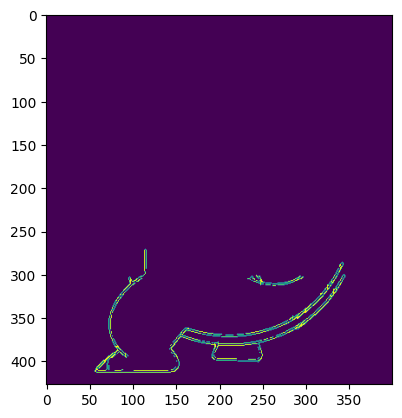

In [16]:
plt.imshow(imgs[2])

In [17]:
for k in range(progress_num):
    cv2.imwrite(f'img_test-{k}.jpg',imgs[0]-imgs[k+1])

In [50]:
for k in range(7):
    print(imgs[k].shape)

(427, 400)
(427, 400)
(427, 400)
(427, 400)
(427, 400)
(427, 400)
(427, 400)


In [61]:
test = imgs[0]
for i in range(progress_num):
    dif = test-imgs[i+1]
    for j in dif:
        for k in j:
            if (k==255 and k==0):
                print(k)

In [ ]:
batch_size = 50
for b_row in range(int(img.shape[0]/batch_size)):
    for b_col in range(int(img.shape[1]/batch_size)):
        line_remain = 0
        for row in range(batch_size):
            for col in range(batch_size):
                if img[row+b_row*50][col+b_col*50] == 255:
                    line_remain+=1


In [19]:
path="C:\dsfa\asdfas\dkf.jpgd"

print(path.split('.')[-1])

jpgd


In [20]:
if path.split('.')[-1] != ('jpg' or 'png'):
    assert 0, "only jpg and png avilable"

AssertionError: only jpg and png avilable

pylee


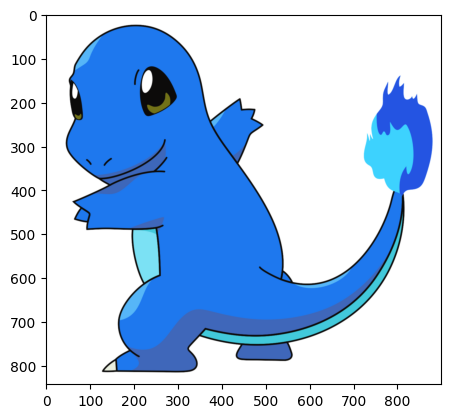

In [9]:
img_path = 'C:/Users/poweron/Desktop/drawing_arm/pylee.png'
img_name = img_path.split('.')[0].split('/')[-1]
img = cv2.imread(img_path)
plt.imshow(img)
print(img_name)
os.mkdir(os.path.join(os.path.split(img_path)[0], img_name))


In [6]:
import os